# Hotel Data
#### This notebook explores a data set containing hotel booking information

In [1]:
#Read in the file and import pandas
import pandas as pd
hotel_data = pd.read_csv("C:/Users/Omar.Simjee/Downloads/hotel-booking-demand/hotel_bookings.csv")

In [2]:
#Initial look at data set
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
#check the columns of the dataframe
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
#create new column to contain total nights of stay
hotel_data["total_nights"] = hotel_data["stays_in_weekend_nights"] + hotel_data["stays_in_week_nights"]

In [5]:

#This is where we take the data and sort it by year, month, week, and day
hotel_data = hotel_data.sort_values(by=['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month'])

In [6]:
#rename columns for ease of use
hotel_data = hotel_data.rename(columns = {'arrival_date_year': 'year', 'arrival_date_month': 'month', 'arrival_date_week_number':'week_number', 'arrival_date_day_of_month': 'day'})

In [7]:
#checking to see the total nights booked for each week
hotel_data.groupby(['week_number'])['total_nights'].sum()

week_number
1      3490
2      3570
3      4208
4      4010
5      3994
6      5028
7      6276
8      6135
9      7401
10     7582
11     7084
12     6841
13     7799
14     7724
15     8859
16     8317
17     9177
18     9966
19     8221
20     9198
21     8697
22     8429
23     9134
24     9049
25     9671
26     8368
27    10387
28    11293
29    11075
30    11890
31    10959
32    12374
33    13238
34    11842
35     9973
36     8482
37     8143
38     8342
39     8938
40     8076
41     8965
42     7594
43     7671
44     6952
45     6923
46     5178
47     5298
48     4191
49     5330
50     4060
51     2598
52     4768
53     6489
Name: total_nights, dtype: int64

In [8]:
#checking to see the total nights booked for each month
hotel_data.groupby(['month'])['total_nights'].sum()

month
April        37335
August       54077
December     21849
February     24455
January      17618
July         49705
June         39116
March        33489
May          38634
November     21667
October      34887
September    36425
Name: total_nights, dtype: int64

In [9]:
#checking to see the total nights booked for each year
hotel_data.groupby(['year'])['total_nights'].sum()

year
2015     74588
2016    189219
2017    145450
Name: total_nights, dtype: int64

In [10]:
#Graphing total nights by week 
import matplotlib.pyplot as plt

plt.plot(hotel_data.groupby(['week_number'])['total_nights'].sum())
plt.show()
#while this is much more granular data, initially I want to look at the month by month differences and come back to see the week
# by week difference

<Figure size 640x480 with 1 Axes>

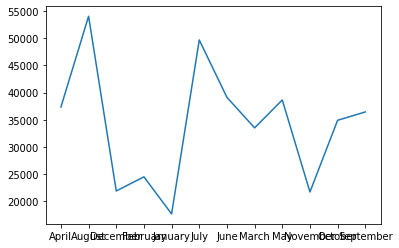

In [11]:
#graphing total nights by month
#since we'll be using it a lot setting it here so that we can access it easier
month_grouped_data = hotel_data.groupby('month')

plt.plot(hotel_data.groupby(['month'])['total_nights'].sum())
plt.show()
#need to order months properly

In [12]:
#Replacing month names with their corresponding number value
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, "June": 6,
    "July" : 7, "August" : 8, "September" : 9, "October" : 10, "November" : 11, "December" : 12}

hotel_data['month'] = hotel_data['month'].replace(d)

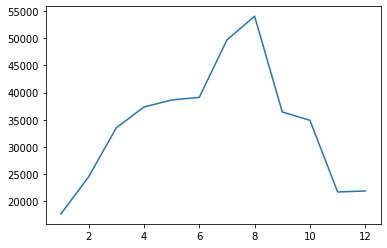

In [13]:
#setting it as a variable cause we access it a lot 
month_grouped_data = hotel_data.groupby('month')
#Plotting again to see the total nights by month in order
plt.plot(month_grouped_data['total_nights'].sum())
plt.show()
#Clear peak between June and September, these are Summer months so it makes sense that people are spending more nights in hotels

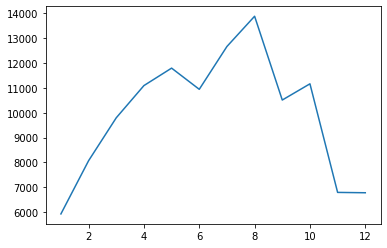

In [14]:
#plotting to see the total number of bookings per month
plt.plot(month_grouped_data.count()['hotel'])
plt.show()
#Still has the peak in Summer months but here we see that there are also smaller peaks in May and October

<function matplotlib.pyplot.show(*args, **kw)>

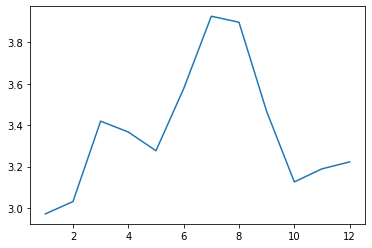

In [15]:
#plotting to see average number of nights stayed per month
plt.plot(month_grouped_data['total_nights'].sum()/month_grouped_data.count()['hotel'])
plt.show
#I wanted to see the change in average nights stayed, this shows that while there are smaller peaks in bookings in May and October
#, those months are both actually small valleys in average number of nights stayed and signal the beginning and end of the busy
# (Summer) season.

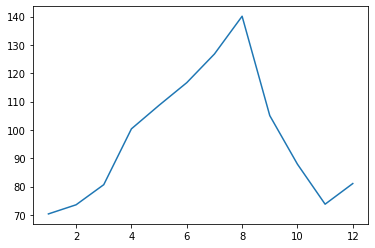

In [16]:
#plotting to see adr (average daily rate) by month
plt.plot(month_grouped_data['adr'].mean())
plt.show()
#adr (average daily rate) has a very clear peak in July (the middle of summer) and drops from there

<function matplotlib.pyplot.show(*args, **kw)>

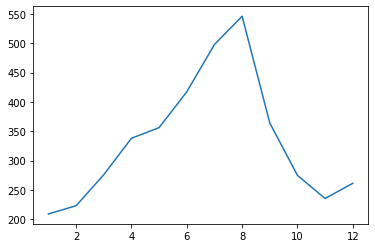

In [17]:
#plotting to see average value made per booking per month
average_stay = month_grouped_data['total_nights'].sum()/month_grouped_data.count()['hotel']
monthly_adr = month_grouped_data['adr'].mean()
plt.plot(average_stay*monthly_adr)
plt.show
#very closely follows the adr values. Shows that the adr is accounting for the average numbers of nights stayed already

### At this point it's pretty clear that Summer months are the peak months across what I believe to be main indicators: total number of bookings, total number of nights, avg number of days stayed, adr, and reveune per booking. Now I want to look at some of the other columns to try and see the quality of the bookings


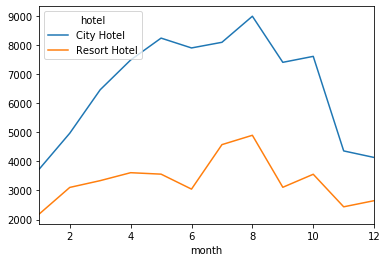

In [18]:
#graphing out the total nights booked by type (City vs Resort)
hotel_data.groupby(['month', 'hotel'])['total_nights'].count().unstack().plot()
#both tend to rise and fall with the same rates

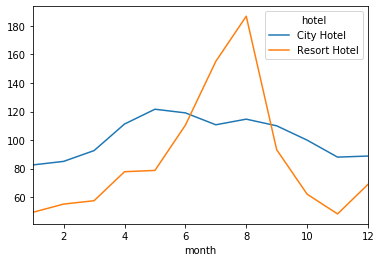

In [19]:
#checking to see difference in adr between city and resort
hotel_data.groupby(['month', 'hotel'])['adr'].mean().unstack().plot()
#A big difference now in terms of seasonal rates. City actually peaks in May and sort of drops from there but doesn't have
# a very large range of prices overall. Resort peaks in July and has a very large range of prices with it being 3 times more 
# expensive in summer as opposed to off peak in Winter.

#Since there's a difference in adr there might also be a difference in the amount made per booking

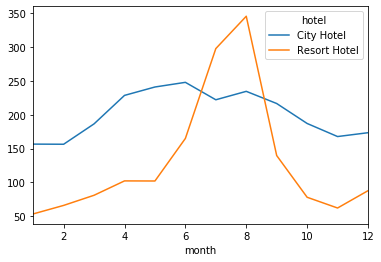

In [20]:
#average number of days stayed per booking
average_days_stayed = (hotel_data.groupby(['month','hotel'])['total_nights'].sum()/month_grouped_data.count()['hotel'])

#average adr
average_adr = hotel_data.groupby(['month', 'hotel'])['adr'].mean()

#multiply them to get average revenue per booking
(average_days_stayed*average_adr).unstack().plot()
#follows roughly the same trend as the previous plot, so just confirms the previous insights

### The above plots show that in order to get the most value for their money, consumers should be looking to book rooms between October and May. In particular, with Resort hotels they can get far better prices by booking in those months

### On the Hotel owners end of things, let's look into other factors related to why the prices go up in Summer months

In [21]:
#I want to look into the number of people per booking
hotel_data.groupby(['month', 'adults'])['hotel'].count().unstack()
#As the table shows, anythinug above 3 adults is such a small number that I feel it can be ignored

adults,0,1,2,3,4,5,6,10,20,26,27,40,50,55
month,,,,,,,,,,,,,,
1,26.0,1987.0,3711.0,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34.0,1972.0,5710.0,350.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43.0,2272.0,7038.0,437.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32.0,1924.0,8520.0,610.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,27.0,2458.0,8843.0,457.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,22.0,2055.0,8292.0,566.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,50.0,1274.0,10134.0,1190.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,48.0,1168.0,11373.0,1271.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,19.0,1863.0,8291.0,320.0,7.0,NaN,NaN,NaN,NaN,4.0,2.0,1.0,1.0,NaN


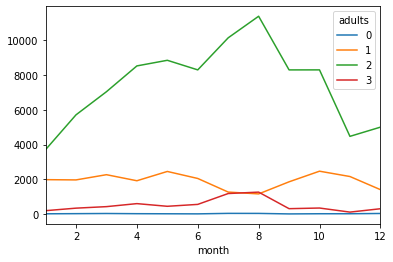

In [22]:
hotel_data[hotel_data["adults"] < 4].groupby(['month', 'adults'])['hotel'].count().unstack().plot()
#This graph shows that the number of hotels booked with 2 adults follows the general trend of bookings with the peak in summer.
#This makes sense as families go on vacation in summer. This also lines up with the fact that single person bookings drop in 
#summer as individuals on business trips or getting hotel by themselves are most likely shifting to spend time with
#their families and not booking hotels just for themselves.

In [23]:
hotel_data.groupby(['month', 'children'])['hotel'].count().unstack()
#I'm going to ignord the rows with 3 or more children as they are such a small number that they can be ignored but it is clear
#that 3 children hotels still peak in summer


children,0.0,1.0,2.0,3.0,10.0
month,,,,,
1,5613.0,183.0,130.0,3.0,NaN
2,7503.0,346.0,213.0,6.0,NaN
3,9308.0,274.0,210.0,2.0,NaN
4,10310.0,422.0,352.0,5.0,NaN
5,11234.0,273.0,280.0,4.0,NaN
6,10216.0,394.0,324.0,5.0,NaN
7,11047.0,934.0,659.0,20.0,1.0
8,11930.0,1131.0,787.0,25.0,NaN
9,10118.0,182.0,208.0,NaN,NaN


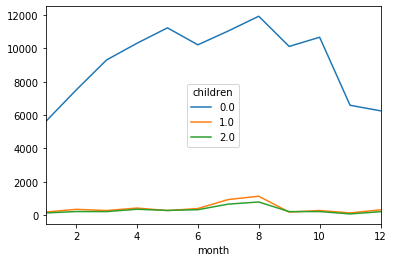

In [24]:
hotel_data[hotel_data["children"] < 3].groupby(['month', 'children'])['hotel'].count().unstack().plot()
#This one is really quite interesting as it seems that the majority of hotels are booked with 0 children. The number of hotels
#booked with children does rise in Summer months as expected but not nearly as much as I would have predicted. It seems more so
#that just more hotels are booked in summer overall

In [25]:
hotel_data[hotel_data["children"] < 1]['hotel'].count()
#119390 is the total number of bookings. That means that over 90% of bookings actually do not have children. Perhaps there
# is a difference between city and resort hotels?

110796

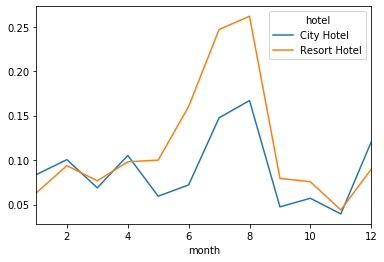

In [26]:
hotel_data.groupby(['month', 'hotel'])['children'].mean().unstack().plot()
#even across hotel types, the vast majority of bookings have less than 1 child as part of the booking. That number does go up 
#in summer but it is still clear that hotels should be gearing their services towards hotels of 1 to 2 people